In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

df = pd.read_csv('data_new.csv')

# 6. Гипотезы

**Гипотеза 1:** \
NASDAQ и S&P оба включают в себя крупнейшие компании, просто S&P больше компаний включает и там условия немного другие. Но по идее у них расхождение должно быть относительно постоянным. Хотя в то же время не факт, потому что крупнейшие компании могут быть более волатильны и наоборот. Короче вот и проверим.

$$
H_0: μ_{nsdq} \neq μ_{sp} \\
H_1: μ_{nsdq} = μ_{sp}
$$

Text(0, 0.5, 'Значение разницы')

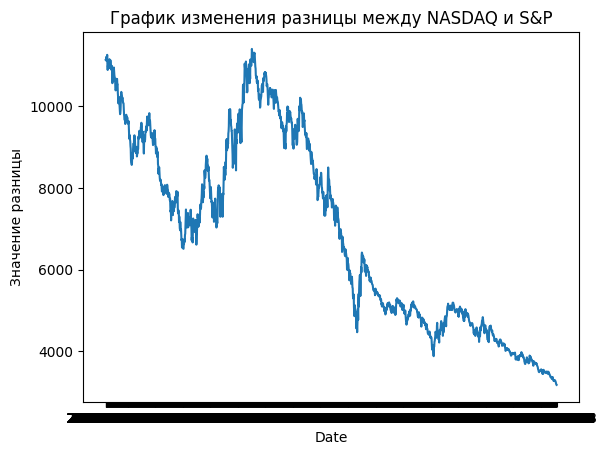

In [3]:
df['diff_mean'] = df.NASDAQ_price.mean() - df['S&P500_price'].mean()
df['diff'] = df.NASDAQ_price - df['S&P500_price']
sns.lineplot(df[['Date', 'diff']], x = df['Date'], y = df['diff'])
plt.title('График изменения разницы между NASDAQ и S&P')
plt.xlabel('Date')
plt.ylabel('Значение разницы')

Ладно, гипотеза не подтвердился даже графиком, поэтому отмена.

**Гипотеза 2:** \
Окей, ну может у них хотя бы распределения у насдака и сп похожи. Сначала посмотрим на графики.

Text(0.5, 1.0, 'Распределение значений S&P500')

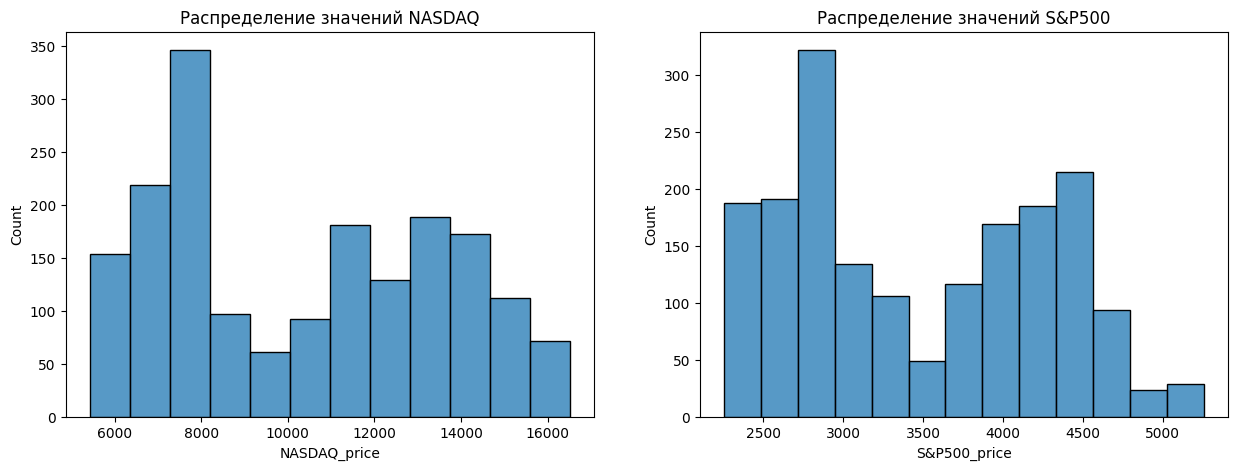

In [4]:
fig, ax = plt.subplots(1, 2, figsize = (15, 5))
sns.histplot(df.NASDAQ_price, ax = ax[0])
ax[0].set_title('Распределение значений NASDAQ')
sns.histplot(df['S&P500_price'], ax = ax[1])
ax[1].set_title('Распределение значений S&P500')

Штош, графики в целом походи. Да, не слишком, но все-таки стоит проверить гипотезу через статистические тесты. Будем использовать для этого тесты Вилкоксона-Манна-Уитни и Колмогорова-Смирнова. Если p-value, которые они покажут, будут выше уровня значимости (зададим его на уровне $\alpha = 0.5$), то мы гипотеза $H_0$ - случайные величины одинаково распределены - не будет отвергнута. Let's get to it.

In [5]:
print('P-value теста Вилкоксона-Манна-Уитни:', stats.mannwhitneyu(df.NASDAQ_price, df['S&P500_price']).pvalue)
print('P-value теста Колмогорова_Смирнова:', stats.ks_2samp(df.NASDAQ_price, df['S&P500_price']).pvalue)

P-value теста Вилкоксона-Манна-Уитни: 0.0
P-value теста Колмогорова_Смирнова: 0.0


Oh look at that... P-value прям совсем маленькие, поэтому мы вообще ни на каком уровне не может принять эту гипотезу. \
Я ошибся, я могу один раз ошибиться? (возможно, не один)

**Гипотеза 3:** \
Мы там выше писали, что распределение цены биткиона похоже на хи-квадрат. Давайте проверим это статистически. Но сначала вот график-напоминание.

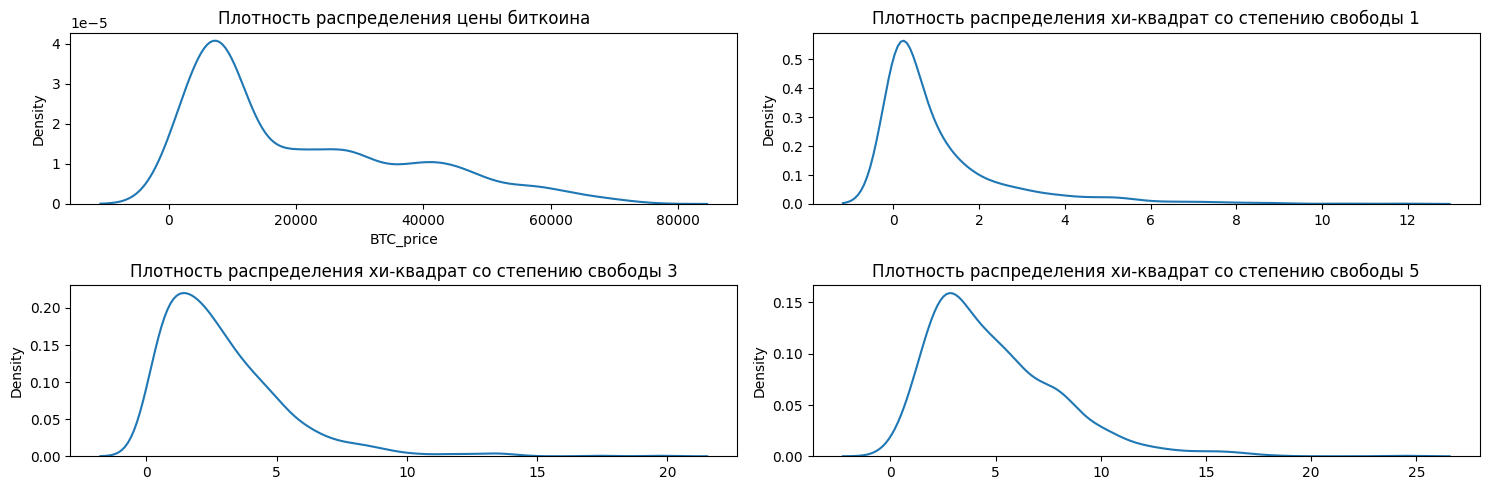

In [6]:
fig, ax = plt.subplots(2, 2, figsize = (15, 5))
sns.kdeplot(df['BTC_price'], ax = ax[0, 0])
ax[0, 0].set_title('Плотность распределения цены биткоина')
sns.kdeplot(stats.chi2.rvs(1, size=1000), ax = ax[0, 1])
ax[0, 1].set_title('Плотность распределения хи-квадрат со степению свободы 1')
sns.kdeplot(stats.chi2.rvs(3, size=1000), ax = ax[1, 0])
ax[1, 0].set_title('Плотность распределения хи-квадрат со степению свободы 3')
sns.kdeplot(stats.chi2.rvs(5, size=1000), ax = ax[1, 1])
ax[1, 1].set_title('Плотность распределения хи-квадрат со степению свободы 5')

plt.tight_layout()

Стало понятно, что это скорее какая-то комбинация хи-квадрат с разными степенями свободы, но больше всего на что-то типа степень свободы 3 похоже. Давайте проверим это с помощью тестов Колмогорова-Смирнова и встроенной функции. Они оба сравнивают теоретическое и эмперическое распределение. Логика с p-value такая же, как раьше.

In [7]:
print('P-value теста на распределение хи-квадрат', stats.chisquare(df.BTC_price).pvalue)
print('P-value теста Колмогорова-Смирнова', stats.kstest(df.BTC_price, 'chi2', args=(3,)).pvalue)

P-value теста на распределение хи-квадрат 0.0
P-value теста Колмогорова-Смирнова 0.0


Все опять достаточно грустно. Ну как сказать, объективно, просто мы были не правы. Оказывается, вообще не хи-квадрат распределение. Ну и ладно, значит не будем работать с битком как с хи-квадратом.